In [64]:
from __future__ import print_function
import cv2
import numpy as np
 
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
 
 
def alignImages(im1, im2):
 
  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
   
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
   
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
   
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)
 
  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]
 
  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("/home/joinet/Downloads/matches.jpg", imMatches)

   
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
   
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
  M = cv2.estimateRigidTransform(points1, points2, True)
  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
   
  return im1Reg, h, M
 
 
if __name__ == '__main__':
   
  # Read reference image
  img1 = cv2.imread("/home/joinet/pcl/old.jpg", cv2.IMREAD_COLOR)

  # Read image to be aligned
  img2 = cv2.imread("/home/joinet/pcl/new.jpg", cv2.IMREAD_COLOR)

  # Blur image
  #kernel = np.ones((5,5),np.float32)/25
  #img1 = cv2.filter2D(img1,-1,kernel)
  #img2 = cv2.filter2D(img2,-1,kernel)
   
  print("Aligning images ...")
  # Registered image will be resotred in imReg. 
  # The estimated homography will be stored in h. 
  img_homo, h, M = alignImages(img1, img2)
  #print(h)
  print(M)

  # Write aligned image to disk. 
  cv2.imwrite("/home/joinet/Downloads/img_homo.jpg", img_homo)
  homo_add = cv2.add(img2, img_homo) 
  cv2.imwrite("/home/joinet/Downloads/homo_add.jpg", homo_add)
    
    
  
  rows,cols,c = img2.shape
  #img_rigid = cv2.warpAffine(img1, M, (cols,rows))
  #cv2.imwrite("/home/joinet/Downloads/img_rigid.jpg", img_rigid)
  '''
  vis = cv2.add(im, dst) 
  cv2.imwrite("/home/joinet/Downloads/result.jpg", dst)'''

Aligning images ...
[[ 0.99935614 -0.01952113  8.00599405]
 [ 0.01509791  0.9974613  -4.96633794]]


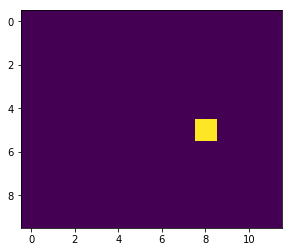

In [51]:
import matplotlib.pyplot as plt
imm = np.zeros((int(10), int(12), 3), np.uint8)

imm[5][8] = (255, 255, 255)
im1Gray = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)
#imgplot = plt.imshow(imm)
imgpl = plt.imshow(im1Gray)